## Esame Metodi Numerici  4 Luglio 2025 - Turno I Ore 9

# Esercizio 1

Si consideri il sistema lineare:

     A  x = b 

dove A è la matrice dei coefficienti, b è il termine noto, ed x è il vettore delle incognite da determinare.
I dati di questo sistema lineare sono contenuti nel file **testI.mat**.

- Si implementino e si testino sui dati forniti due metodi che sono adatti a risolvere tale sistema lineare con le caratteristiche delle matrici dei coefficienti date in input.
                                      **[punti 8]**
- Si confrontino i risultati ottenuti e si giustifichino utilizzando  e richiamando gli aspetti teorici dei metodi implementati.
                                      **[punti 3]**

Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('testI')``

``A=dati["A"] ``

``A=A.astype(float)``

`` b=dati["b"] ``

`` b=b.astype(float)``

In [36]:
import numpy as np 
import matplotlib.pyplot as plt
from SolveTriangular import *
import scipy.linalg as spLin

In [5]:
from scipy.io import loadmat

import numpy as np

dati = loadmat('testI')

A=dati["A"] 

A=A.astype(float)

b=dati["b"]

b=b.astype(float)

In [6]:
#controllo se la matrica A è quadrata 
m, n = A.shape
if m==n:
    print("Matrice quadrata, dimensione: ", m)
else: 
    print("matrice non quadrata")

Matrice quadrata, dimensione:  400


sparsità:  0.116775


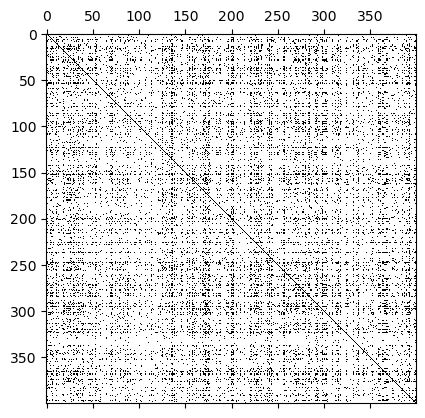

In [8]:
#la matrice è quadrata e di grandi dimensioni 400, controllo la sparsità
sp=np.count_nonzero(A)/(m*n)
print("sparsità: ", sp)
plt.spy(A)

In [10]:
#controllo se la matrice è simmetrica e definita positiva
flagS= A.T==A
if np.all(flagS==True):
    print("matrice simmetrica")
else:
    print("Matrice non simmetrica")

autovalori = np.linalg.eigvals(A)
if np.all(autovalori >0):
    print("matrice definita positiva")
else:
    print("matrice non definita positiva")

Matrice non simmetrica
matrice definita positiva


In [34]:
condA = np.linalg.cond(A)
print("condizionamento di A: ", condA)

condizionamento di A:  398.0942877444205


In [15]:
#la matrice non è simmetrica quindi utilizzo come metodi di risoluzione jacobi, gauss-seidel
def jacobi(A,b,x0,toll,it_max):
    errore=1000
    d=np.diag(A)
    n=A.shape[0]
    invM=np.diag(1/d)
    E=np.tril(A,-1)
    F=np.triu(A,1)
    N=-(E+F)
    T=invM@N
    autovalori=np.linalg.eigvals(T)
    raggiospettrale=np.max(np.abs(autovalori))
    print("raggio spettrale jacobi", raggiospettrale)
    it=0
    
    er_vet=[]
    while it<=it_max and errore>=toll:
        x=(b+N@x0)/d.reshape(n,1)
        errore=np.linalg.norm(x-x0)/np.linalg.norm(x)
        er_vet.append(errore)
        x0=x.copy()
        it=it+1
    return x,it,er_vet

RISULTATI CON METODO DI JACOBI
raggio spettrale jacobi 0.4820926155362989
iterazioni eseguite:  25


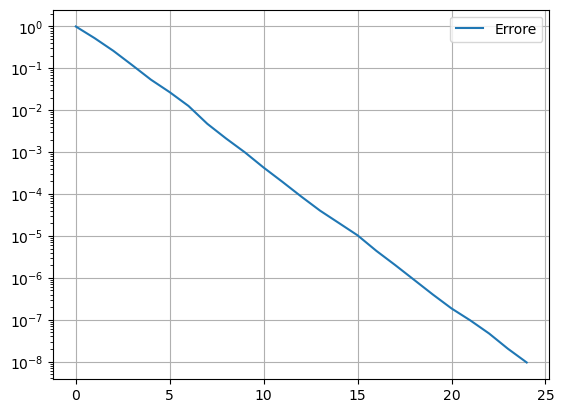

In [33]:
#ora calcolo il risultato con il metodo di Jacobi
print("RISULTATI CON METODO DI JACOBI")
x0 = np.zeros_like(b)
toll = 1e-8
it_max=100
x_jacobi,it_jacobi,er_vet_jacobi = jacobi(A,b,x0,toll,it_max)
print("iterazioni eseguite: ", it_jacobi)
#print("X: ", x_jacobi)
plt.semilogy(np.arange(len(er_vet_jacobi)), er_vet_jacobi)
plt.legend(["Errore"])
plt.grid()
plt.show()

In [17]:
def gauss_seidel(A,b,x0,toll,it_max):
    errore=1000
    d=np.diag(A)
    D=np.diag(d)
    E=np.tril(A,-1)
    F=np.triu(A,1)
    M=D+E
    N=-F 
    T=np.linalg.inv(M)@N
    autovalori=np.linalg.eigvals(T)
    raggiospettrale=np.max(np.abs(autovalori))
    print("raggio spettrale Gauss-Seidel ",raggiospettrale)
    it=0
    er_vet=[]
    while it<=it_max and errore >= toll:
        x, flag = Lsolve(M, b-F@x0)
        errore=np.linalg.norm(x-x0)/np.linalg.norm(x)
        er_vet.append(errore)
        x0=x.copy()
        it=it+1
    return x,it,er_vet

RISULTATI CON METODO DI GAUSS SEIDEL
raggio spettrale Gauss-Seidel  0.2889737780164911
iterazioni eseguite:  16


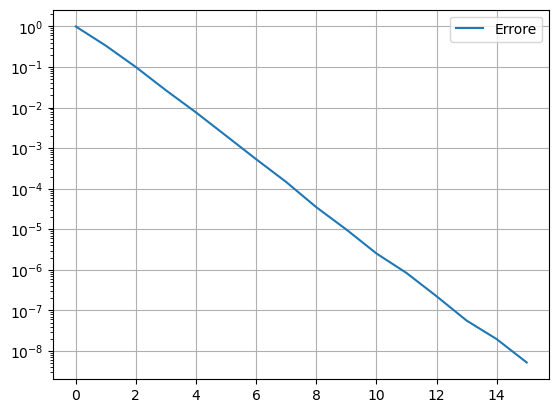

In [32]:
#ora calcolo il risultato con il metodo di Gauss Seidel
print("RISULTATI CON METODO DI GAUSS SEIDEL")
x0 = np.zeros_like(b)
toll = 1e-8
it_max=100
x_gauss,it_gauss,er_vet_gauss = gauss_seidel(A,b,x0,toll,it_max)
print("iterazioni eseguite: ", it_gauss)
#print("X: ", x_jacobi)
plt.semilogy(np.arange(len(er_vet_gauss)), er_vet_gauss)
plt.legend(["Errore"])
plt.grid()
plt.show()

I due metodi fanno parte della classe dei metodi diretti per la soluzione di un sistema lineare Ax=b, cioè in un numero finito di passi si arriva alla soluzione. In particolare il metodo di Gauss Seidel 
in generale converge per le matrici che hanno il raggiospettrale <1. Questo metodo converge sicuramente anche con le matrici che sono diagonali strettamenti crescenti, ovvero che in ogni riga il valore assoluto del valore sulla diagonale è maggiore strettamente della somma dei valori assoluti degli altri elementi sulla stessa riga.

In [31]:
def diagonale_Strettamente(A):
    diag=0
    for i in range(A.shape[0]):
        diag= A[i][i]
        sum = np.sum(A[i,])-diag
        if sum>=diag:
            return False
        return True

if diagonale_Strettamente(A):
    print("A è diagonale strettamente crescente")
else:
    print("non è diagonale strettamente")

A è diagonale strettamente crescente


Con il metodo qui sopra abbiamo controllato che la matrice fosse diagonale strettamente creente e che quindi il metodo di Gauss Seidel convergesse-
Entrambi i metodo arrivano alla soluzione tramite lo splitting della matrice iniziale in due sotto matrici M  e N. Viene poi calcolata la matrice di iterazione T che è data da M^(-1)@N.
Il metodo di Jacobi è generalmente più lento a convergere e anche in questo caso impiega 9 iterazioni in più rispetto a GaussSeidel che ne impiega 25. Intuibile dai grafici è la convergenza lineare di entrambi i metodi.

- Data la matrice
$$
\left[
\begin{array}{cccc}
3.0 &2.0 & 1.0 & -1.0\\
4.0 & 7.0 & 3.0 & 2.0\\
2.0 & 1.0 & 7.0 & 7.0\\
1.0 & 4.0 & 2.0 & 7.0
\end{array}
\right ],
$$
calcolarne la fattorizzazione lu di Gauss  facendo uso della funzione scipy.linalg.lu e:
- sfruttarla per il calcolo del suo determinante (confrontare l'esattezza del calcolo con quello ottenuto usando la funzione numpy.linalg.det)             **[punti: 2]**
- sfruttarla per il calcolo della sua inversa risolvendo n sistemi lineari (confrontare l'inversa con quella ottenuta usando la funzione numpy.linalg.inv)
                                                                                                    **[punti: 2]**

In [35]:
A1=np.array([[3.0,2.0, 1.0,-1.0],[4.0,7.0,3.0,2.0], [2.0,1.0,7.0,7.0],[1.0,4.0,2.0,7.0]])
print(A1)

[[ 3.  2.  1. -1.]
 [ 4.  7.  3.  2.]
 [ 2.  1.  7.  7.]
 [ 1.  4.  2.  7.]]


In [55]:

PT, L , U = spLin.lu(A1)#il metodo lu restituisce PT che è la trasposta della matrice di permutazione e le due matrici di fattorizzazion di LU
P=PT.T.copy()#calcolo la matrice P di permutazione
#dalla teoria so che PA1 = LU
#considero G = PA e so che det(G) = det(L)*det(U)
detG = np.linalg.det(L)*np.linalg.det(U)
detA1=detG/np.linalg.det(P)
print("Determinante con LU: ", detA1)
print("Determinante con numpy: ", np.linalg.det(A1))

Determinante con LU:  360.99999999999983
Determinante con numpy:  360.99999999999983


In [72]:
#per il calcolo dell'inversa uso la matrice di permutazione e faccio fare alla matrice identità le stesse permutazioni che vengono fatte su A in modo da trovarmi l'inversa
n = 4 #dimensione della matrice 
I = np.eye(4)#iniziallizzo la matrice identità
print (I)
invA = np.zeros_like(A)
for i in range(n):
    for j in range(n):
        e = I[i][j]
        h= P[i][j]
        invA [i][j]=e*h
print("Inversa calcolata con LU: ", invA)
print("Inversa con numpy: ", np.linalg.inv(A))
id = A@np.linalg.inv(A)
id2 =
print("Identitè: ", id2)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
Inversa calcolata con LU:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Inversa con numpy:  [[ 4.69474433e-01 -4.83249546e-04  5.77213689e-04 ...  8.76668974e-05
   1.17678835e-04 -7.22437639e-03]
 [-2.16912492e-03  4.05096688e-01  3.96238881e-04 ...  4.14867929e-05
   1.21384065e-04 -8.09150145e-04]
 [ 3.08778192e-04 -1.99157535e-04  6.12306201e-01 ... -2.03208158e-03
  -1.83727142e-04 -2.52559539e-01]
 ...
 [ 1.12694530e-02  1.50705167e-04  5.35200602e-04 ...  5.55442525e-01
  -1.39551023e-03  2.83532994e-03]
 [-2.97394736e-03  2.74654647e-04  1.23993397e-03 ... -3.77584485e-02
   6.54152676e-01 -3.44900082e-03]
 [ 1.15149552e-03  6.21087571e-04 -9.26991277e-04 ... -2.93343324e-05
   5.05301064e-04  1.12131027e+00]]
Identitè:  [[ 4.86234054e+00 -2.92077442e-04  0.00000000e+00 ... -2.01170325e-20
   2.55738228e-03  

## Esercizio 2

-  Implementare il  metodo di Newton Raphson, la variante delle corde e la variante di Shamanskii per la soluzione di un sistema di equazioni non  lineari  [**punti: 7**]

Risolvere il sistema di equazioni non lineari

$$
\left\{
\begin{array}{c}
x_0\cdot x_1+x_0=1 \\
 x_0^2+x_1^2=9
\end{array}
\right.
$$
con ciascuno dei tre metodi e confrontare per ciascun metodo il grafico dell'errore relativo tra due iterati successivi, giustificando i risultati alla luce della teoria.  [**punti: 3**]

- Descrivi, teoricamente, la variante del Metodo di Newton-Raphson per calcolare il minimo di una funzione non lineare in più variabili  [**punti: 2**]
 

**Nota Bene**: Servirsi del metodo grafico per individuare un 
iterato iniziale  $X^{(0)}$ nell'intorno della soluzione che si vuole approssimare.  Per fare cio',  visualizzare le 
curve di livello corrisponenti a z=0 delle due superfici $z_1 = f_1 (x_0 ,x_1 )$ e $z_2 = f_2(x_0 , x_1 )$ e 
definire come iterato iniziale un vettore $X^{(0)}=(x_0^{(0)},x_1^{(0)})$ oppurtuno le cui componenti appartengono ad un 
intorno della soluzione (cioè  dei punti di  intersezione tra le curve di livello delle due superfici) \]

In [102]:
def newton_raphson(initial_guess, F_numerical, J_Numerical, tolX, tolF, max_iterations):
    X= np.array(initial_guess, dtype=float)
    it=0
    erroreF=1+tolF
    erroreX=1+tolX
    
    errore=[]
    
    while it<=max_iterations and erroreX >= tolX and erroreF >= tolF:
        
        jx = J_numerical(X[0],X[1])
        
        if np.linalg.det(jx)==0:
            print("La matrice dello Jacobiano calcolata nell'iterato precedente non è a rango massimo")
            return None, None,None
        
        fx = F_numerical(X[0],X[1])
        fx = fx.squeeze() 
        
        s = np.linalg.solve(jx,-fx)
        
        Xnew=X+s
        
        normaXnew=np.linalg.norm(Xnew,1)
        if normaXnew !=0:
            erroreX=np.linalg.norm(s)/normaXnew 
        else:
            erroreX=np.linalg.norm(s)
        
        errore.append(erroreX)
        fxnew=F_numerical(Xnew[0], Xnew[1])
        erroreF= np.linalg.norm(fxnew.squeeze(),1)
        X=Xnew
        it=it+1
    
    return X,it,errore

In [103]:
 def newton_raphson_corde(initial_guess, F_numerical, J_Numerical, tolX, tolF, max_iterations):
    X= np.array(initial_guess, dtype=float)
    it=0
    erroreF=1+tolF
    erroreX=1+tolX
    errore=[]
    
    while it<=max_iterations and erroreX >= tolX and erroreF >= tolF:
        
        if it==0:
            jx = J_Numerical(X[0],X[1])
        
            if np.linalg.det(jx):
                print("La matrice dello Jacobiano calcolata nell'iterato precedente non è a rango massimo")
                return None, None,None
        
        fx = F_numerical(X[0],X[1])
                         
        fx = fx.squeeze() 
        
        s = np.linalg.solve(jx,-fx)
        
        Xnew=X+s
        
        normaXnew=np.linalg.norm(Xnew,1)
        if normaXnew !=0:
            erroreX=np.linalg.norm(s)/normaXnew 
        else:
            erroreX=np.linalg.norm(s)/normaXnew
        
        errore.append(erroreX)
        fxnew=F_numerical(Xnew[0],Xnew[1])
        erroreF= np.linalg.norm(fxnew.squeeze(),1)
        X=Xnew
        it=it+1
    
    return X,it,errore

In [104]:
def newton_raphson_sham(initial_guess, update, F_numerical, J_Numerical, tolX, tolF, max_iterations):

    X= np.array(initial_guess, dtype=float)
    it=0
    erroreF=1+tolF
    erroreX=1+tolX    
    errore=[]
    
    while it<=max_iterations and erroreX >= tolX and erroreF >= tolF:
        
        if it %update ==0:
            jx = J_Numerical(X[0],X[1])
        
            if np.linalg.det(jx)==0:
                print("La matrice dello Jacobiano calcolata nell'iterato precedente non è a rango massimo")
                return None, None,None
        
        fx = F_numerical(X[0],X[1])
        fx = fx.squeeze() 
        
        s = np.linalg.solve(jx,-fx)
        
        Xnew=X+s
        
        normaXnew=np.linalg.norm(Xnew,1)
        if normaXnew !=0:
            erroreX=np.linalg.norm(s)/normaXnew 
        else:
            erroreX=np.linalg.norm(s)/normaXnew
        
        errore.append(erroreX)
        fxnew=F_numerical(Xnew[0],Xnew[1])
        erroreF= np.linalg.norm(fxnew.squeeze(),1)
        X=Xnew
        it=it+1
    
    return X,it,errore


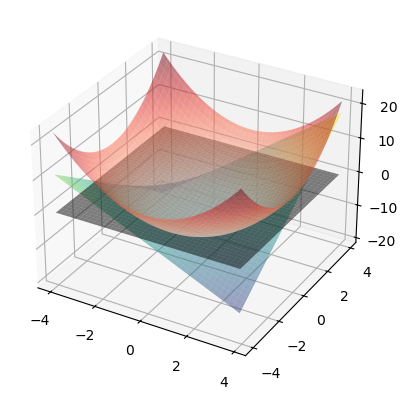

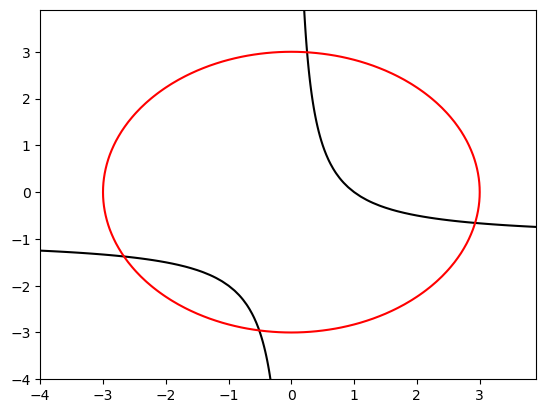

La matrice dello Jacobiano calcolata nell'iterato precedente non è a rango massimo


TypeError: unsupported operand type(s) for -: 'NoneType' and 'int'

In [113]:
import sympy as sym
from sympy import symbols, Matrix, lambdify
#Scrivere in froma simbolica le due equazioni del sistema, ad esempio
x_sym, y_sym = symbols('x_sym y_sym')
f1_sym = lambda x_sym,y_sym: x_sym*y_sym+x_sym-1   #[-1,1]
f2_sym= lambda x_sym,y_sym: x_sym**2+y_sym**2-9

#Definitre il vettore di Funzioni
def F_sym(f1_sym,f2_sym):
    return Matrix([[f1_sym(x_sym,y_sym)], [f2_sym(x_sym,y_sym)]])   

# Calcolo della matrice Jacobiana simbolicamente
J_sym = F_sym(f1_sym,f2_sym).jacobian(Matrix([x_sym, y_sym]))

# Converte la matrice jacobiana Simbolica in una funzione che può essere valutata numericamente mediante lambdify
J_numerical = lambdify([x_sym, y_sym], J_sym, np)

# Converte il vettore di funzioni Simbolico in una funzione che può essere valutata numericamente mediante lambdify
F_numerical = lambdify([x_sym, y_sym], F_sym(f1_sym,f2_sym), np)

#Disegnare superfici e curve di livello per determinare la stima dell'iterato iniziale
#Esempio 
 
x = np.arange(-4, 4, 0.1)
y = np.arange(-4, 4, 0.1)
X, Y = np.meshgrid(x, y)
Z=np.zeros_like(X)
superfici=F_numerical(X,Y).squeeze()
 
# Plotta la superficie  
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Plotta la superficie
ax.plot_surface(X, Y, superfici[0,:,:], cmap='viridis',alpha=0.5)
# Plotta la superficie
ax.plot_surface(X, Y, superfici[1,:,:], cmap='Reds',alpha=0.5)
ax.plot_surface(X, Y, Z, cmap='gray',alpha=0.5)
plt.show()

#Plot superifici di controllo
plt.contour(X, Y,superfici[0,:,:], levels=[0], colors='black')
plt.contour(X, Y,superfici[1,:,:], levels=[0], colors='red')
plt.show()


tolX=1e-12
tolF=1e-12
max_iterations = 1000
initial_guess=[2.5, 5]
update =1.2
X_newton, it_newton, errore_newton = newton_raphson(initial_guess, F_numerical, J_numerical, tolX, tolF, max_iterations)
X_corde, it_corde, erroe_sham = newton_raphson_corde(initial_guess, F_numerical, J_numerical, tolX, tolF, max_iterations)
X_sham,it_sham,errore_sham = newton_raphson_sham(initial_guess, update, F_numerical, J_numerical, tolX, tolF, max_iterations)
plt.semilogy(np.arange(it_newton), errore_newton, 'r-', np.arange(it_corde), errore_corde, 'b-', np.arange(it_sham), errore_sham, 'g-')

Le tre varianti del metodo di newton differiscono tra di loro sul momento nel quale viene aggiornato lo jacobiano. Nel metodo classico di newton_raphson viene aggiornato ad ogni iterazione facendo in modo che la funzione di errore sia più lineare. La variante corde invece lo modifica solo quando è nullo. La versione di shamansky lo modifica ogni tot iterazioni in modo che ci sia un controllo periodico, nel mentre si usa lo stesso jacobiano. 

il metodo di newton_raphson per il calcolo della matrice utilizza la matrice essiana al posto dello Jacobiano e questo viene calcolata ad ogni iterato. Serve che la matrice della hessiana sia a 
determinante maggiore di zero. Viene poi calcolato il gradiente della funzione e risolto il sistema tra l'hessiana e il gradiente. Ad ogni iterazione viene trovato la nuova x tramite la somma della vecchia e la soluzione del sistema appena nomiinato.

## Domande Intelligenza Artificiale
**NB: Ogni risposta esatta:  +0.5 punti, ogni risposta errata: -0.5 punti. La mancanza di risposta:  0 punti**

Domande a risposta multipla

**1.** Quale delle seguenti definizioni descrive meglio un'epoca nel training di una rete neurale?
- Il numero di volte in cui viene aggiornato un singolo peso nella rete
- Il tempo impiegato per completare un ciclo di forward pass e backward propagation
- [x]Il numero di volte in cui l'intero set di dati di training viene esposto alla rete
- Una misura della complessità del modello di rete neurale

**2.** Per una rete neurale, l’apprendimento è legato a:

•	[x]Minimizzare la funzione obiettivo

•	Minimizzare la funzione di attivazione

•	Massimizzare il valore dei pesi tramite l’algoritmo di back-propagation

•	Massimizzare il valore della funzione di training


**3.**  Il     Quali di queste affermazioni sono vere: 

  [x]  Il layer softmax viene utilizzato per trasformare l’output della rete in probabilità 

    La funzione softmax è continua ma non differenziabile 

    Nell’addestramento di una rete neurale per un task di classificazione binaria, la loss function più comunemente utilizzata è la Binary Cross-Entropy 

    La Categorical Cross-Entropy è una funzione di loss comunemente usata per problemi di regressione a più valori 

**4.**  Quali di queste affermazioni sono vere: Quando si impiega un’architettura di rete esistente: 

  Dato un problema da risolvere, conviene utilizzare un modello con pesi pre-addestrati su un problema simile 

    I pesi di un modello pre-addestrato non sono modificabili 

    È possibile utilizzare un’architettura esistente anche inizializzandone i pesi con valori casuali 

    Architetture di rete differenti possono raggiungere punteggi di accuratezza simili se addestrate sullo stesso.  
    ataset 

    Architetture di rete differenti possono raggiungere punteggi di accuratezza differenti se addestrate sullo stesso[x]
o dataset 


**5.** A cosa serve il validation set?

•	[x]A trovare i migliori iperparametri del modello

•	Ad addestrare il modello 

•	A testare il modello

•	A trovare le etichette dei dati di input


**Domande aperte**

Il learning rate nella formula di aggiornamento dei pesi mediante gradient descent. Aggiornamento del learning rate programmato (learning rate scheduling) : step decay, decadimento esponenziale, decadimento dipendente dal tempo. **[punti 2.5]**


Learning rate adattivo per ogni peso (durante il processo di ottimizzazione) : Adagrad, RMSProp, Adam. (formula di aggiornamento dei pesi e discussioni)
**[punti 2.5]**